# Group 6: Productivity Prediction of Garment Employees

**Group Members:
Ryan Randazzo,
HaijiaoCui,
James Cho,
J Garcia,
James Ta,
Kevin Cordray,
Bryant Lam**

# Assignment Tasks


**1.** Perform exploratory data analysis and feature selection<br> 	
**2.** Plot the variable distribution using box plot, histogram, and provide a summary of your understanding<br>
**3.** Provide an insight on the outcome of correlation matrix <br>
**4.** Perform feature extraction using Principal Component Analysis (PCA) <br>
**5.** Develop a machine learning model to predict the “productivity performance” of the employees and compare the “performance metrics” of the algorithms. Summarize your key findings <br>
**6.** Please consider the problem statement as Classification <br>
**7.** Evaluate the performance metrics of logistic regression, SVM classifier, Naïve Bayes classifier, and Random Forest classifier <br>
**8.** Plot the relevant graphs, for example ROC, AUC, etc <br>
**9.** Recommend at least two approaches for increasing the productivity of the employees <br>


**Data Set Information:**
The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.

**Attribute Information:** <br>
**01.** date : Date in MM-DD-YYYY <br>
**02.** quarter : A portion of the month. A month was divided into four quarters <br>
**03.** department : Associated department with the instance <br>
**04.** day : Day of the Week <br>
**05.** team_no : Associated team number with the instance <br>
**06.** targeted_productivity : Targeted productivity set by the Authority for each team for each day.<br>
**07.** smv : Standard Minute Value, it is the allocated time for a task <br>
**08.** wip : Work in progress. Includes the number of unfinished items for products <br>
**09.** over_time : Represents the amount of overtime by each team in minutes <br>
**10.** incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.<br>
**11.** idle_time : The amount of time when the production was interrupted due to several reasons<br>
**12.** idle_men : The number of workers who were idle due to production interruption<br>
**13.** no_of_style_change : Number of changes in the style of a particular product<br>
**14.** no_of_workers : Number of workers in each team<br>
**15.** actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.<br>


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder #Required for category encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors



# Importing Dataset

In [309]:
path = "garments_worker_productivity.csv"
dataset = pd.read_csv(path, header=0, index_col=None, parse_dates=True)

# Dataset Characteristics

## General Description

In [120]:
dataset.describe

<bound method NDFrame.describe of            date   quarter  department        day  team  targeted_productivity   
0      1/1/2015  Quarter1      sweing   Thursday     8                   0.80  \
1      1/1/2015  Quarter1  finishing    Thursday     1                   0.75   
2      1/1/2015  Quarter1      sweing   Thursday    11                   0.80   
3      1/1/2015  Quarter1      sweing   Thursday    12                   0.80   
4      1/1/2015  Quarter1      sweing   Thursday     6                   0.80   
...         ...       ...         ...        ...   ...                    ...   
1192  3/11/2015  Quarter2   finishing  Wednesday    10                   0.75   
1193  3/11/2015  Quarter2   finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2   finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2   finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2   finishing  Wednesday     6                   0.

In [121]:
dataset.head()

date   quarter  department       day  team  targeted_productivity   
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80  \
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men   
0  26.16  1108.0       7080         98        0.0         0  \
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [122]:
dataset.tail()

date   quarter department        day  team  targeted_productivity   
1192  3/11/2015  Quarter2  finishing  Wednesday    10                   0.75  \
1193  3/11/2015  Quarter2  finishing  Wednesday     8                   0.70   
1194  3/11/2015  Quarter2  finishing  Wednesday     7                   0.65   
1195  3/11/2015  Quarter2  finishing  Wednesday     9                   0.75   
1196  3/11/2015  Quarter2  finishing  Wednesday     6                   0.70   

      smv  wip  over_time  incentive  idle_time  idle_men  no_of_style_change   
1192  2.9  NaN        960          0        0.0         0                   0  \
1193  3.9  NaN        960          0        0.0         0                   0   
1194  3.9  NaN        960          0        0.0         0                   0   
1195  2.9  NaN       1800          0        0.0         0                   0   
1196  2.9  NaN        720          0        0.0         0                   0   

      no_of_workers  actual_productivity  
1192            8.0             0.628333  
1193            8.0             0.625625  
1194            8.0             0.625625  
1195           15.0             0.505889  
1196            6.0             0.394722

## Datatypes 

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Analyze Categorical Values

### Date

In [124]:
dataset['date'].value_counts()


date
3/11/2015    24
1/31/2015    24
1/11/2015    23
3/10/2015    23
1/12/2015    23
1/24/2015    23
1/8/2015     22
1/10/2015    22
1/7/2015     22
1/13/2015    22
1/5/2015     22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/22/2015    22
2/25/2015    21
2/26/2015    21
2/28/2015    21
1/3/2015     21
1/4/2015     21
1/28/2015    21
1/27/2015    21
3/4/2015     21
1/25/2015    21
1/17/2015    21
1/14/2015    21
1/6/2015     21
2/18/2015    21
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/19/2015    20
3/5/2015     19
3/7/2015     19
2/24/2015    19
2/23/2015    19
1/1/2015     19
2/3/2015     19
2/15/2015    19
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
1/26/2015    19
2/1/2015     19
2/2/2015     19
2/4/2015     19
2/7/2015     19
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: count, dtype: int64

Change date format

In [310]:
dataset['date'] = pd.to_datetime(dataset['date'])

In [259]:
dataset['date'].dt.day.value_counts()

date
11    66
10    64
8     63
3     62
4     61
7     60
5     59
1     58
28    42
25    42
12    42
22    42
24    42
17    41
26    40
18    40
9     40
2     39
19    39
15    38
14    38
31    24
13    22
27    21
6     21
29    20
21    19
23    19
16    18
20    15
Name: count, dtype: int64

In [102]:
dataset['date'].dt.month.value_counts()

date
1    542
2    443
3    212
Name: count, dtype: int64

In [114]:
dataset['date'].dt.year.value_counts()

date
2015    1197
Name: count, dtype: int64

Remove year from date
All dates are from the same year and only three months of the year.

In [261]:
dataset['date'] = dataset['date'].dt.strftime('%m-%d')

In [262]:
dataset['date'].info

<bound method Series.info of 0       01-01
1       01-01
2       01-01
3       01-01
4       01-01
        ...  
1192    03-11
1193    03-11
1194    03-11
1195    03-11
1196    03-11
Name: date, Length: 1197, dtype: object>

### Quarter

In [263]:
dataset['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

Both date and quarter are time dependent. Look for relationship between both.

<function matplotlib.pyplot.show(close=None, block=None)>

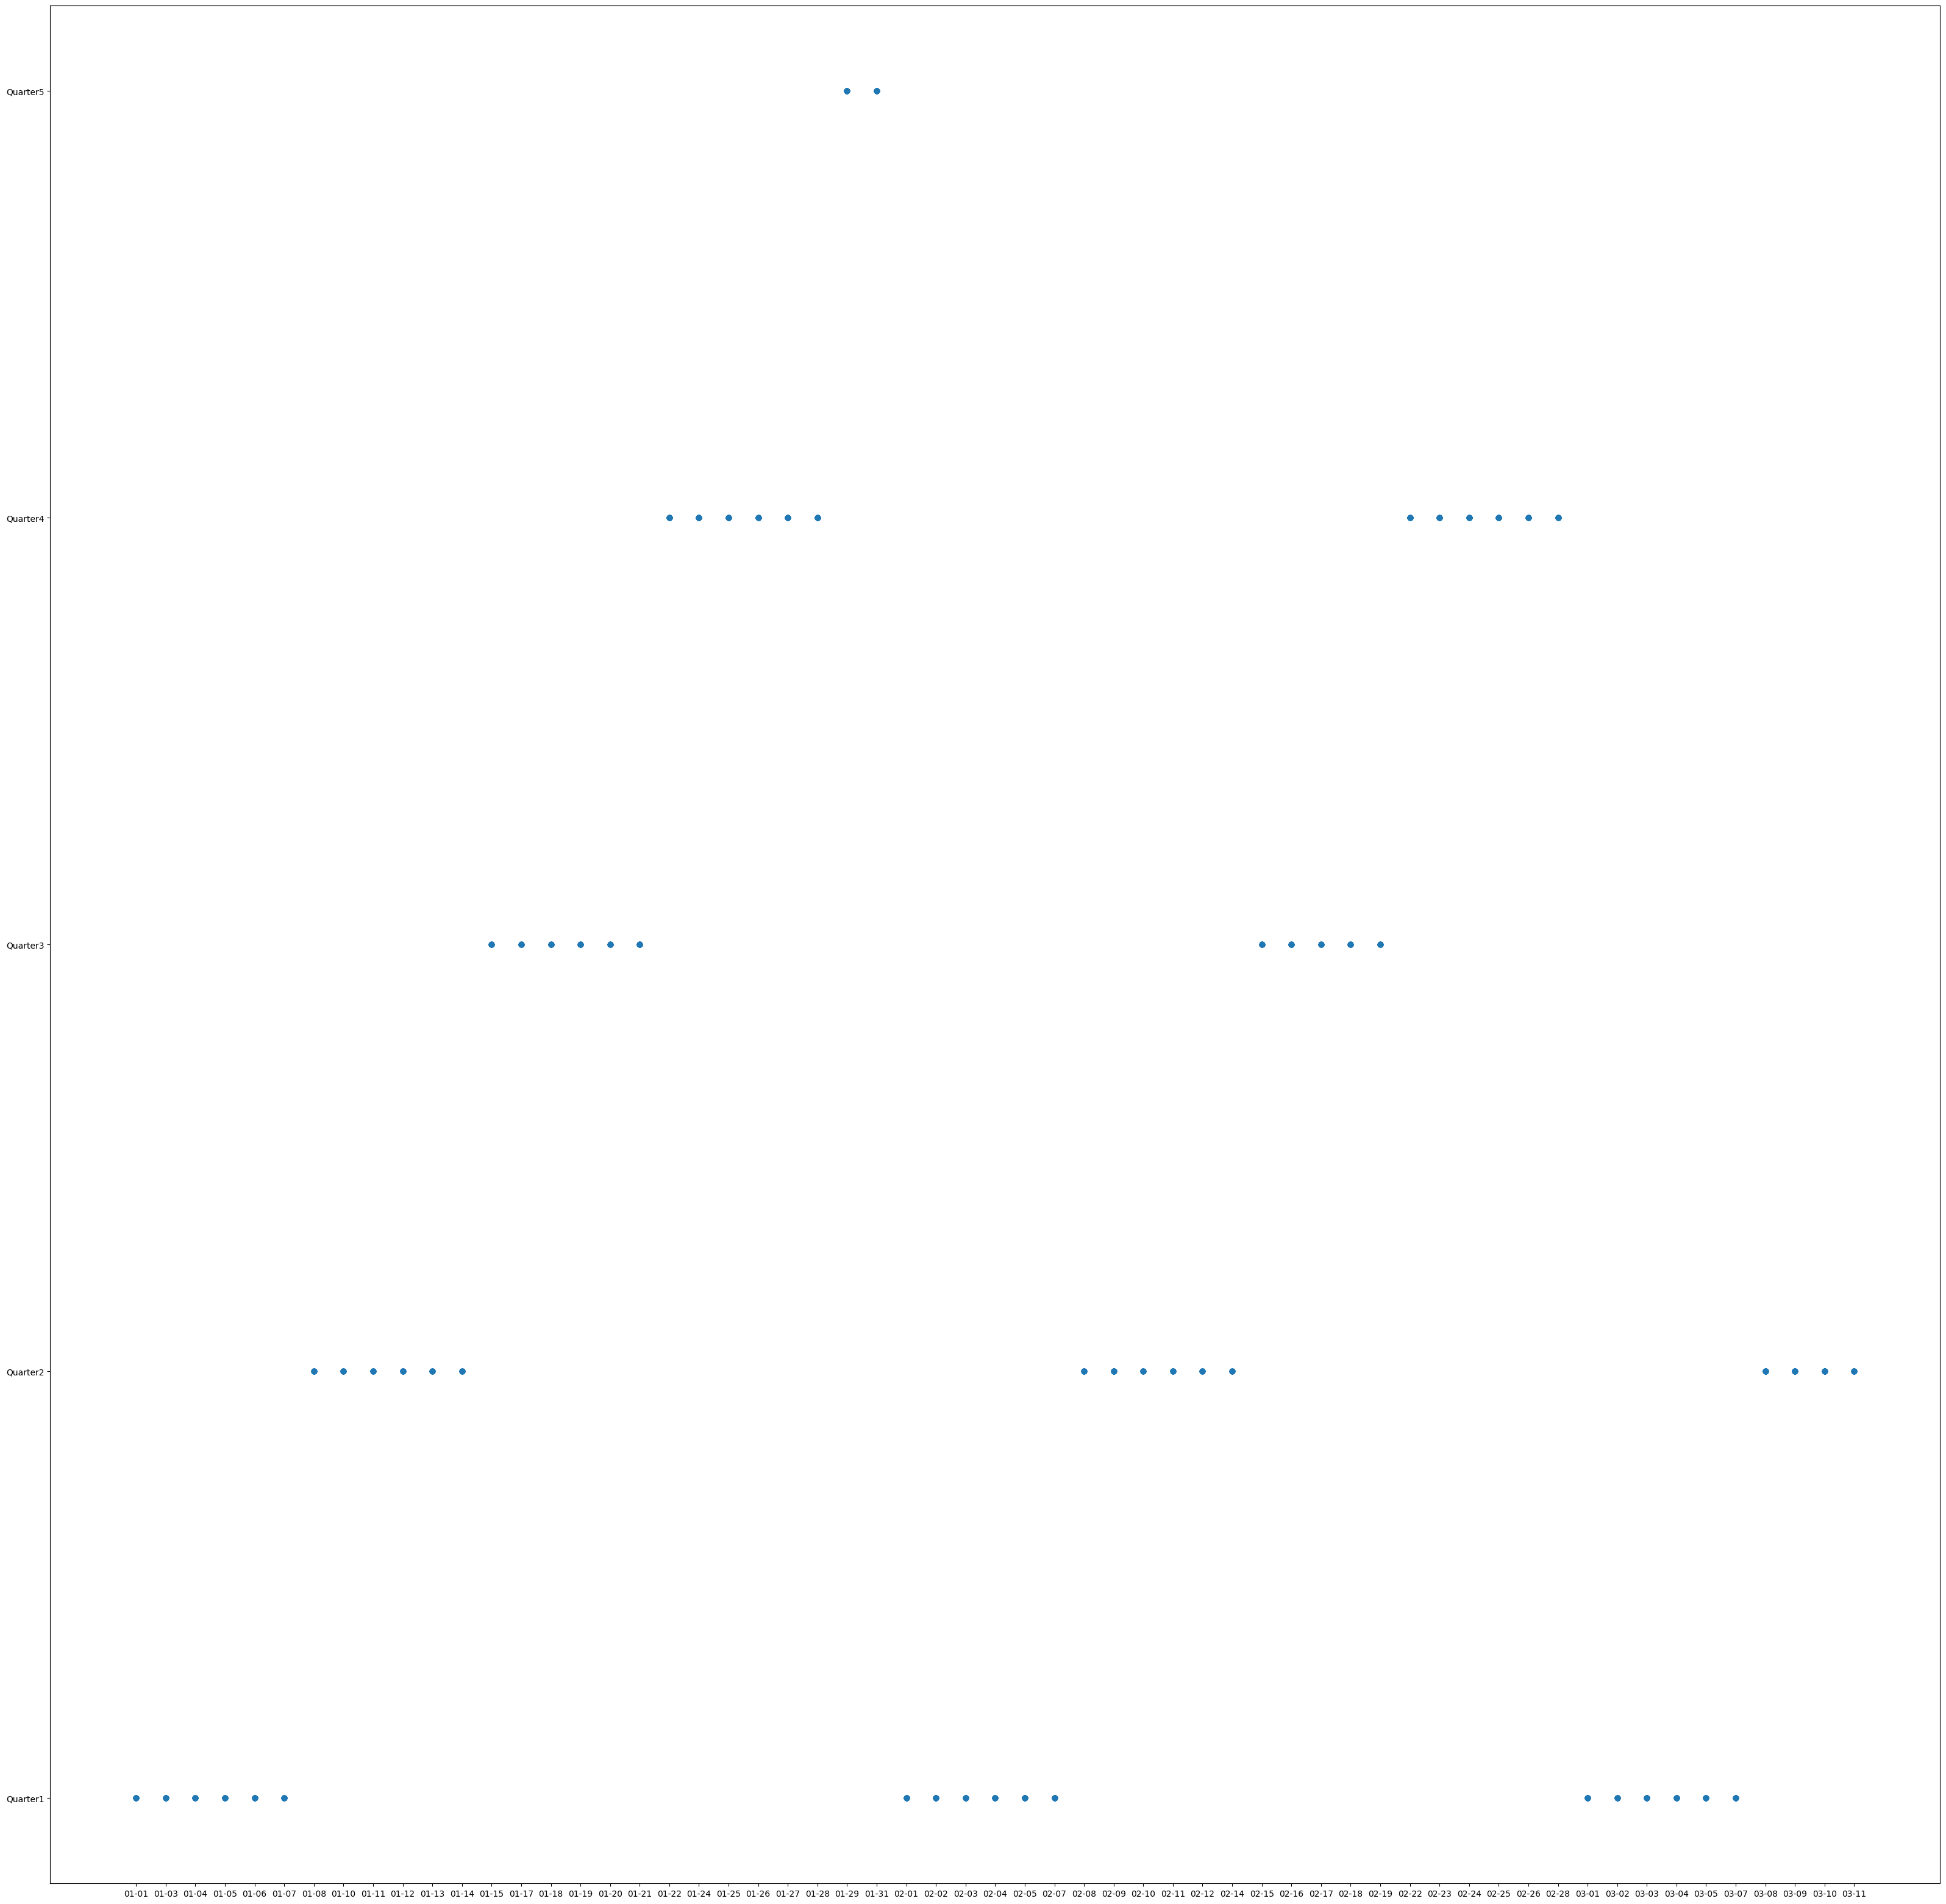

In [264]:
plt.figure(figsize=(40,40))
plt.scatter(dataset['date'], dataset['quarter'])
plt.show

Only days are significant as each quarter has the same unique days each month.
Extract days of each month.

In [311]:
dataset = pd.read_csv(path, header=0, index_col=None, parse_dates=True)
dataset['date'] = pd.to_datetime(dataset['date'])


In [312]:
dataset['date'] = dataset['date'].dt.strftime('%d')

In [267]:
dataset['date'].unique()

array(['01', '03', '04', '05', '06', '07', '08', '10', '11', '12', '13',
       '14', '15', '17', '18', '19', '20', '21', '22', '24', '25', '26',
       '27', '28', '29', '31', '02', '09', '16', '23'], dtype=object)

Date can also be converted to a numerical value

In [313]:
dataset['date'] = dataset['date'].astype(str).astype(int)


<BarContainer object of 1197 artists>

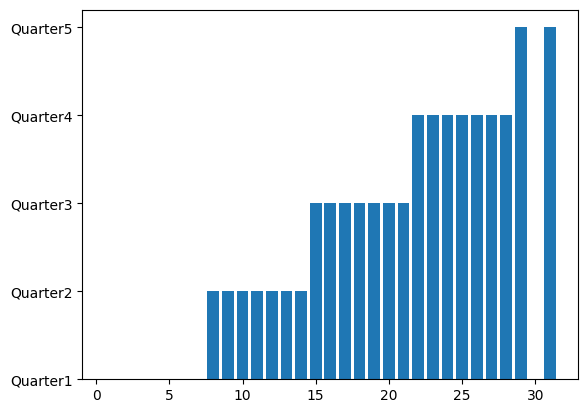

In [269]:
plt.bar(dataset['date'], dataset['quarter'])


### Department

In [270]:
dataset['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [271]:
dataset['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

Department category 'sweing' is mispelled, must be changed to 'sewing' <br>
Category 'finishing' is has data with an added space that must be removed

In [314]:
dataset['department'].replace('sweing', 'sewing', inplace=True)
dataset['department'].replace('finishing ', 'finishing', inplace=True)
dataset['department'].unique()

array(['sewing', 'finishing'], dtype=object)

### Days

In [273]:
dataset['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

## Look for Duplicates

In [274]:
dataset.duplicated().sum()

0

No duplicate records found

## Shape

In [275]:
dataset.shape

(1197, 15)

1197 rows, 15 columns

In [276]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int32  
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Missing Values

Check for missing values

In [277]:
dataset.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

506 null values found in WIP feature. <br>
Replace null values with 0.

In [316]:
dataset['wip'].fillna(0, inplace=True)

Check info again

In [232]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int32  
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### Team

In [233]:
dataset['team'].unique()

array([ 8,  1, 11, 12,  6,  7,  2,  3,  9, 10,  5,  4], dtype=int64)

There are 12 unique teams, this is a category an will be encoded.

## Numeric Features (Continuous and Discrete)

### Overview Boxplot

<Axes: >

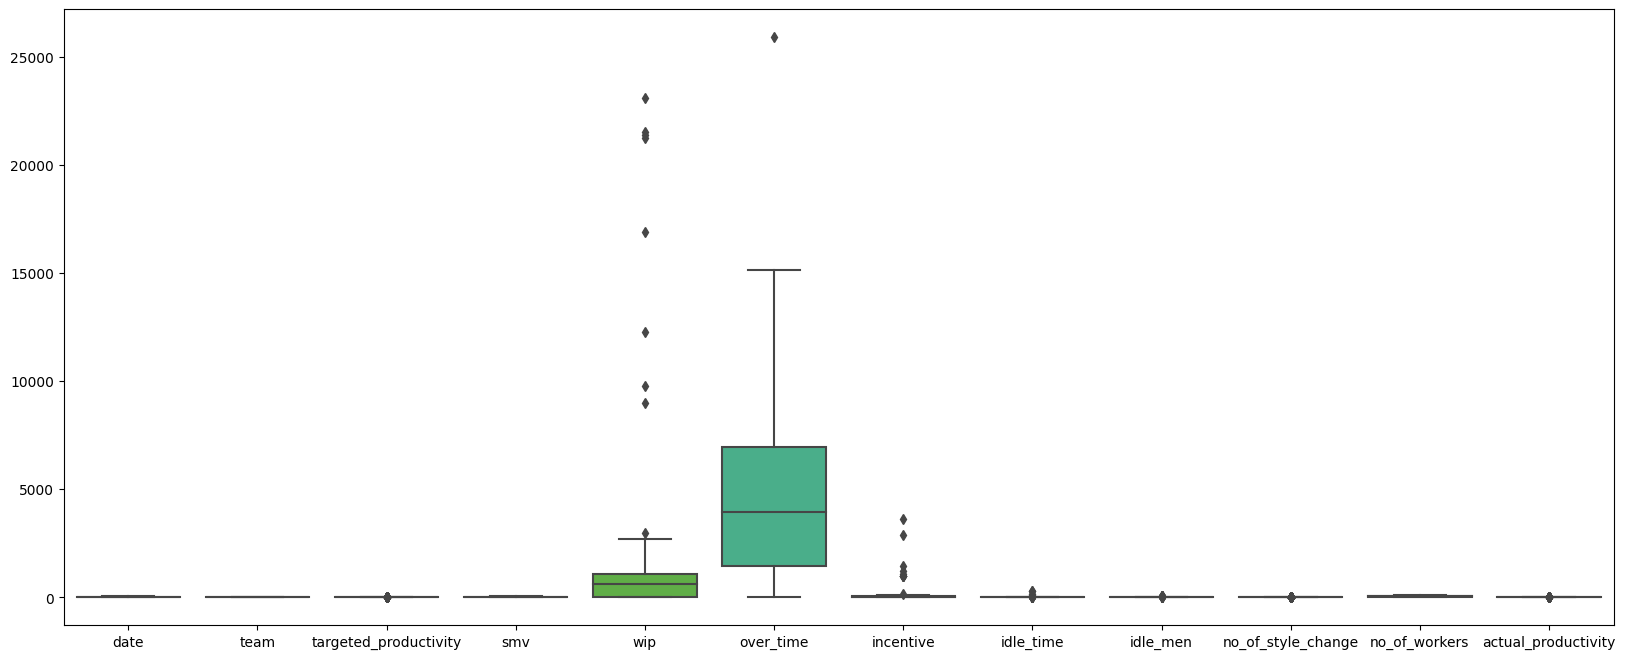

In [242]:
plt.figure(figsize=(20,8))
sns.boxplot(data=dataset)

Overtime and have outliers but not significant

## Encode Categorical Data

In [324]:
dataset = pd.get_dummies(dataset, columns=['team', 'quarter', 'department', 'day'])

### Heatmap

<Axes: >

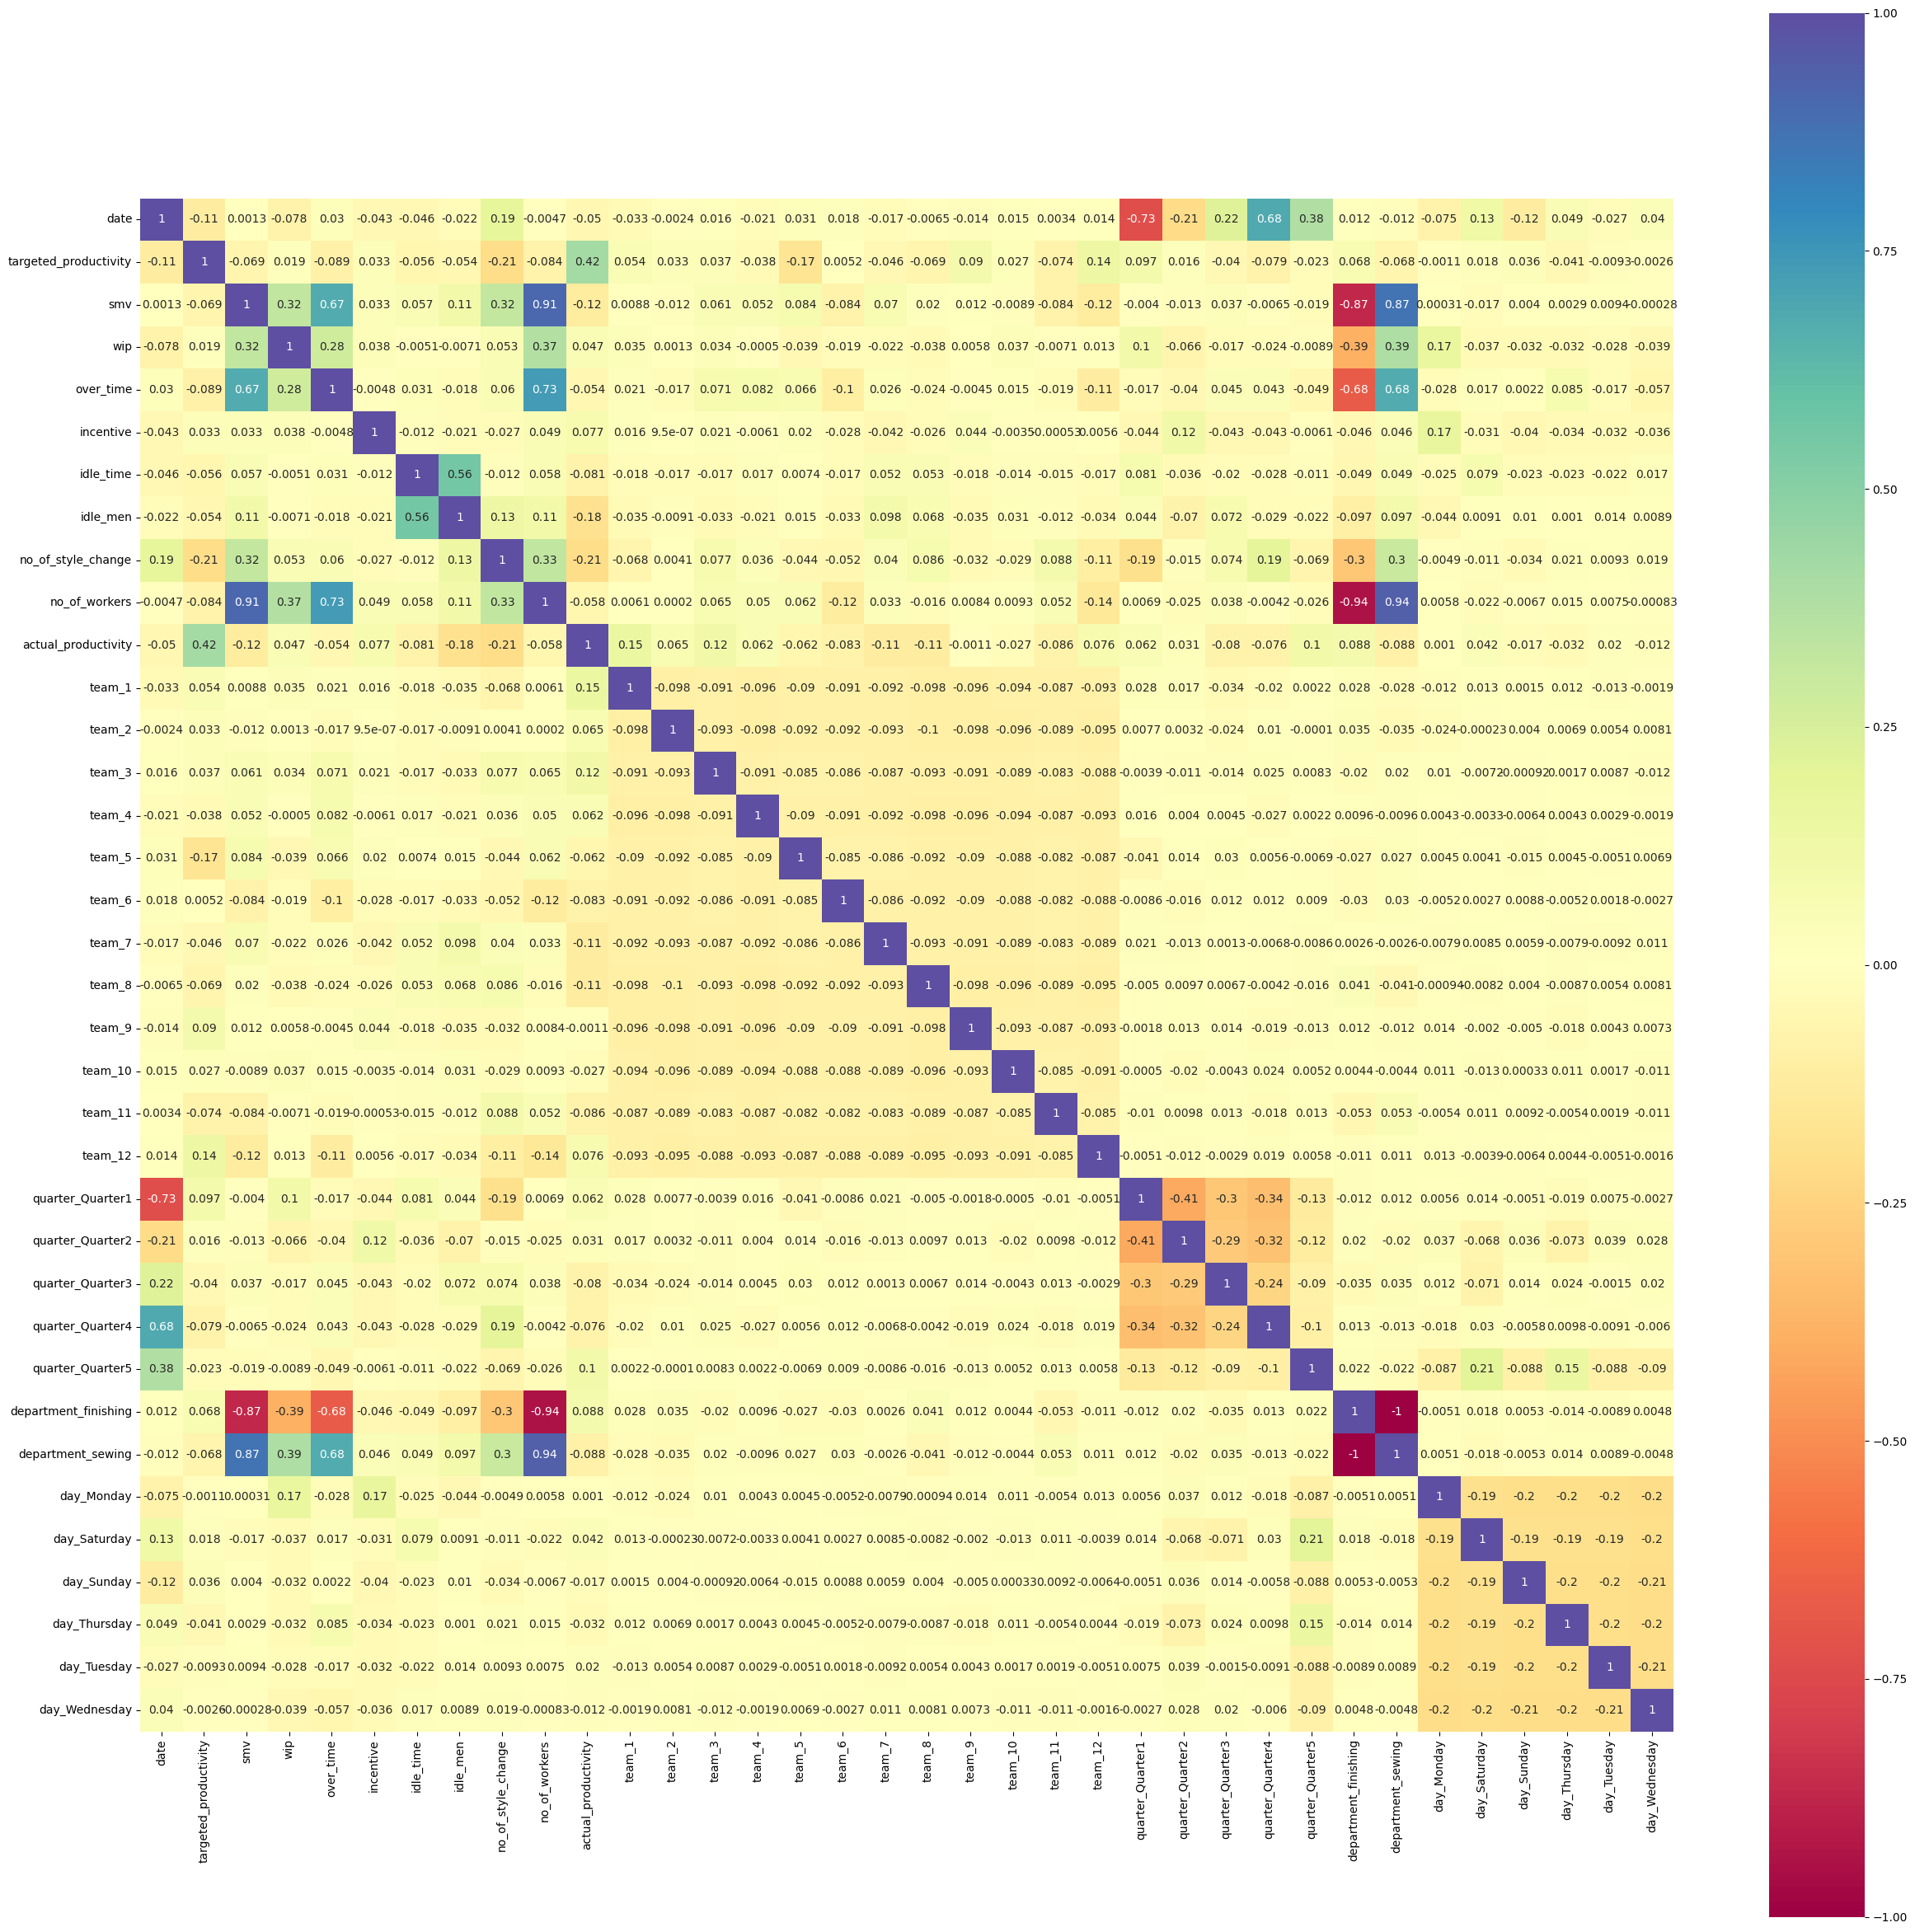

In [325]:
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral',square=True)

## Create Feature (GoalMet)

In [35]:
dataset['productivity_met'] = dataset['actual_productivity'] -dataset['targeted_productivity']

KeyError: 'actual_productivity'

<Axes: >

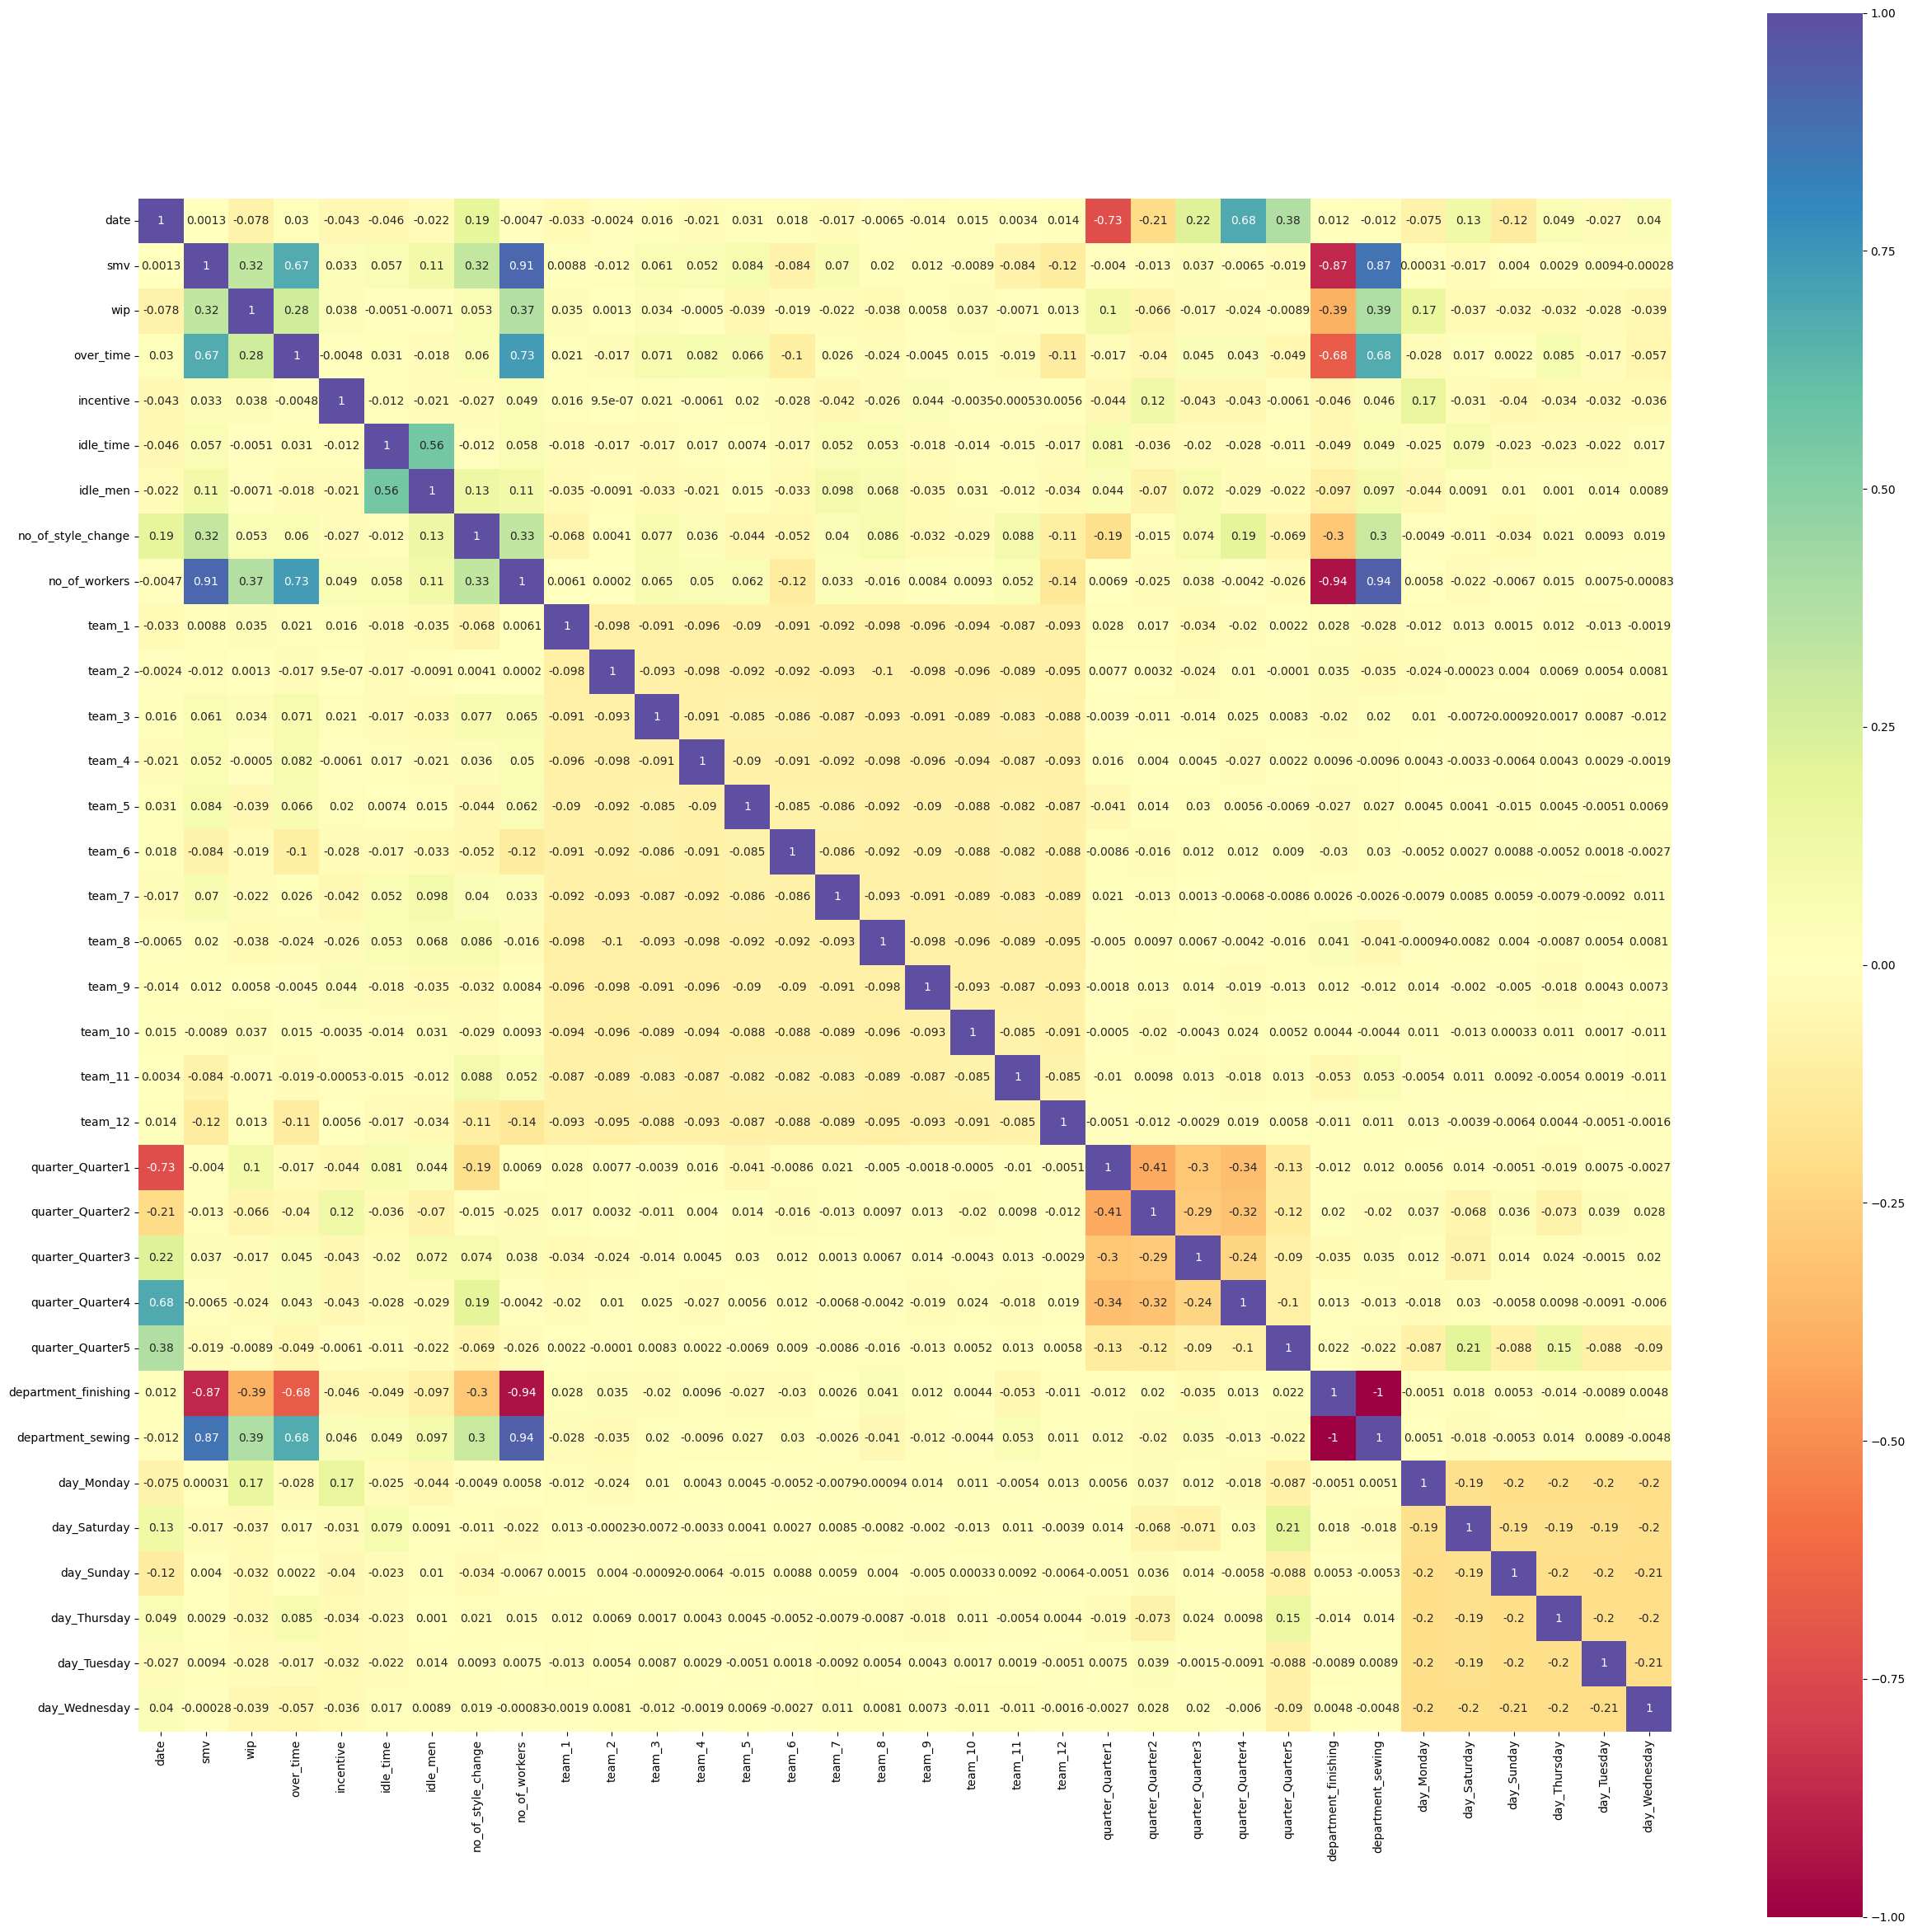

In [36]:
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral',square=True)

## LASSO Regression (L1) for Feature Selection

In [34]:
productivit_met = dataset['actual_productivity'] -dataset['targeted_productivity']


In [24]:
#dataset.pop('actual_productivity')
#dataset.pop('targeted_productivity')

0       0.80
1       0.75
2       0.80
3       0.80
4       0.80
        ... 
1192    0.75
1193    0.70
1194    0.65
1195    0.75
1196    0.70
Name: targeted_productivity, Length: 1197, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(dataset,productivit_met , test_size=0.20, random_state=42)
dataset.feature_names = list(X_train.columns.values)
feature_names = dataset.feature_names


### Create pipeline for estimator

In [37]:
pipeline = Pipeline([
                     ('scaler',RobustScaler()),
                     ('model',Lasso())
])

In [38]:
X_train['date'].value_counts();
y_train.value_counts()

 0.000402    18
 0.050137    12
 0.000651     8
 0.050502     7
 0.000396     6
             ..
 0.050182     1
 0.188384     1
 0.023333     1
 0.189000     1
-0.258958     1
Name: count, Length: 764, dtype: int64

### Estimator

In [39]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.001,10,0.001)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [40]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 9999 candidates, totalling 49995 fits
[CV 1/5] END ...............model__alpha=0.001;, score=-0.000 total time=   0.0s
[CV 2/5] END ...............model__alpha=0.001;, score=-0.000 total time=   0.0s
[CV 3/5] END ...............model__alpha=0.001;, score=-0.000 total time=   0.0s
[CV 4/5] END ...............model__alpha=0.001;, score=-0.000 total time=   0.0s
[CV 5/5] END ...............model__alpha=0.001;, score=-0.000 total time=   0.0s
[CV 1/5] END ...............model__alpha=0.002;, score=-0.000 total time=   0.0s
[CV 2/5] END ...............model__alpha=0.002;, score=-0.000 total time=   0.0s
[CV 3/5] END ...............model__alpha=0.002;, score=-0.000 total time=   0.0s
[CV 4/5] END ...............model__alpha=0.002;, score=-0.000 total time=   0.0s
[CV 5/5] END ...............model__alpha=0.002;, score=-0.000 total time=   0.0s
[CV 1/5] END ...............model__alpha=0.003;, score=-0.000 total time=   0.0s
[CV 2/5] END ...............model__alpha=0.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([1.000e-03, 2.000e-03, 3.000e-03, ..., 9.997e+00, 9.998e+00,
       9.999e+00])},
             scoring='neg_mean_squared_error', verbose=3)

In [42]:
search.best_params_

{'model__alpha': 0.001}

In [43]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [44]:
importance = np.abs(coefficients)

Important features

In [45]:
kept_features = np.array(feature_names)[importance > 0]

Dropped features

In [46]:
dropped_features = np.array(feature_names)[importance == 0]


In [47]:
dropped_features

array(['date', 'smv', 'wip', 'over_time', 'incentive', 'idle_time',
       'idle_men', 'no_of_style_change', 'no_of_workers', 'team_1',
       'team_2', 'team_3', 'team_4', 'team_5', 'team_6', 'team_7',
       'team_8', 'team_9', 'team_10', 'team_11', 'team_12',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sewing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday'], dtype='<U21')

In [ ]:
for i in range (0, len(dropped_features),1):
    dataset.pop(dropped_features[i])

## Feature Scaling

In [25]:
path = "garments_worker_productivity.csv"
dataset = pd.read_csv(path, header=0, index_col=None, parse_dates=True)


In [26]:
dataset['department'].replace('sweing', 'sewing', inplace=True);
dataset['department'].replace('finishing ', 'finishing', inplace=True);
dataset['department'].unique();
dataset['wip'].fillna(0, inplace=True);
dataset = pd.get_dummies(dataset, columns=['team', 'quarter', 'department', 'day']);
productivit_met = dataset['actual_productivity'] -dataset['targeted_productivity'];
#dataset.pop('actual_productivity');
#dataset.pop('targeted_productivity');

In [27]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['date'] = dataset['date'].dt.strftime('%d')
dataset['date'] = dataset['date'].astype(str).astype(int)


In [5]:
for i in range (0, len(dropped_features),1):
    dataset.pop(dropped_features[i])

NameError: name 'dropped_features' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset,productivit_met , test_size=0.20, random_state=42)
dataset.feature_names = list(X_train.columns.values)
feature_names = dataset.feature_names
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=[feature_names])
X_test = pd.DataFrame(X_test, columns=[feature_names])


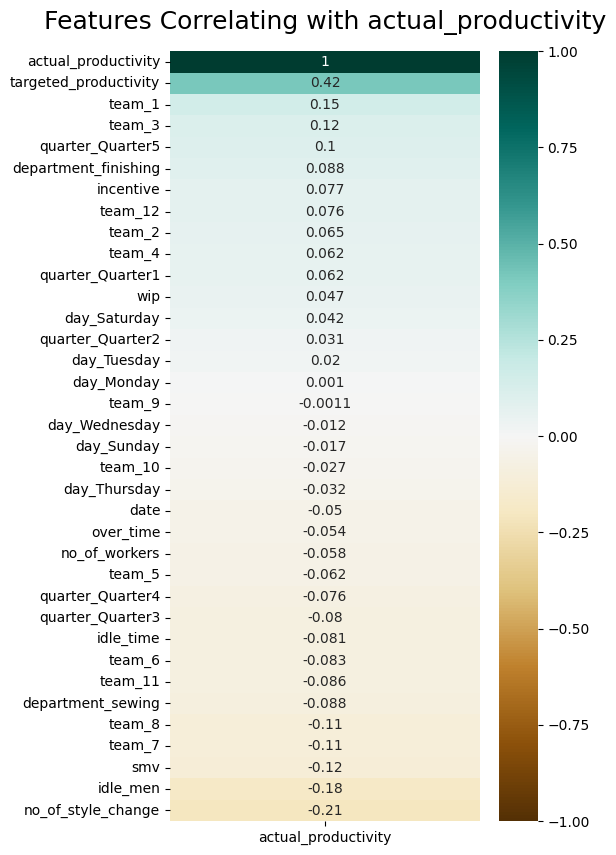

In [15]:
corrMatrix = dataset.corr()
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with actual_productivity', fontdict={'fontsize':18}, pad=16);

In [ ]:
corrMatrix = dataset.corr()
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with actual_productivity', fontdict={'fontsize':18}, pad=16);

# Models<br>
## Naive Bayes

In [104]:
nbayes = GaussianNB()

#X_train.pop('idle_time');
#X_train.pop('idle_men');
#X_train.pop('incentive');
#X_train.pop('over_time');

In [788]:
#X_test.pop('idle_time');
#X_test.pop('idle_men');
#X_test.pop('incentive');
#X_test.pop('over_time');

In [105]:
y_train = (y_train > 0)
y_test = (y_test > 0)

In [106]:
nbayes.fit(X_train, y_train)

GaussianNB()

In [107]:
y_pred = nbayes.predict(X_test)

In [360]:
from sklearn.metrics import f1_score

In [361]:
print('Accuracy with Naive Bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('F1 score with Naive Bayes: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Accuracy with Naive Bayes: 0.9708
F1 score with Naive Bayes: 0.9804


## Random Forest

In [48]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from sklearn.inspection import *
from IPython.display import Image


In [328]:
path = "garments_worker_productivity.csv"
dataset = pd.read_csv(path, header=0, index_col=None, parse_dates=True)

In [329]:
dataset['department'].replace('sweing', 'sewing', inplace=True);
dataset['department'].replace('finishing ', 'finishing', inplace=True);
dataset['department'].unique();
dataset['wip'].fillna(0, inplace=True);
dataset = pd.get_dummies(dataset, columns=['team', 'quarter', 'department', 'day']);
productivit_met = dataset['actual_productivity'] -dataset['targeted_productivity'];
#dataset.pop('actual_productivity');
#dataset.pop('targeted_productivity');

In [330]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['date'] = dataset['date'].dt.strftime('%d')
dataset['date'] = dataset['date'].astype(str).astype(int)

In [331]:
for i in range (0, len(dropped_features),1):
    dataset.pop(dropped_features[i])

In [332]:
X_train, X_test, y_train, y_test = train_test_split(dataset,productivit_met , test_size=0.20, random_state=42)
dataset.feature_names = list(X_train.columns.values)
feature_names = dataset.feature_names

C:\Users\portapot2\AppData\Local\Temp\ipykernel_6348\4250810349.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset.feature_names = list(X_train.columns.values)


In [333]:
y_train = (y_train > 0)
y_test = (y_test > 0)

In [23]:
X_train

date    smv    wip  over_time  incentive  idle_time  idle_men   
1189    11  30.48  914.0       6840         30        0.0         0  \
575      2   3.94    0.0       2280          0        0.0         0   
76       5   2.90    0.0        960          0        0.0         0   
731     12   4.15    0.0       1800          0        0.0         0   
138      8  11.61  548.0      15120         63        0.0         0   
...    ...    ...    ...        ...        ...        ...       ...   
1044     3   4.60    0.0       3360          0        0.0         0   
1095     7   2.90    0.0        960          0        0.0         0   
1130     9   3.94    0.0          0       2880        0.0         0   
860     19  30.10  444.0          0          0        5.0        20   
1126     8   2.90    0.0        960          0        0.0         0   

      no_of_style_change  no_of_workers  team_1  ...  quarter_Quarter4   
1189                   1           57.0   False  ...             False  \
575                    0           19.0    True  ...             False   
76                     0            8.0   False  ...             False   
731                    0           15.0   False  ...             False   
138                    0           31.5   False  ...             False   
...                  ...            ...     ...  ...               ...   
1044                   0            8.0   False  ...             False   
1095                   0            8.0   False  ...             False   
1130                   0           12.0   False  ...             False   
860                    1           59.0   False  ...             False   
1126                   0            8.0   False  ...             False   

      quarter_Quarter5  department_finishing  department_sewing  day_Monday   
1189             False                 False               True       False  \
575              False                  True              False        True   
76               False                  True              False        True   
731              False                  True              False       False   
138              False                 False               True       False   
...                ...                   ...                ...         ...   
1044             False                  True              False       False   
1095             False                  True              False       False   
1130             False                  True              False        True   
860              False                 False               True       False   
1126             False                  True              False       False   

      day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  
1189         False       False         False        False           True  
575          False       False         False        False          False  
76           False       False         False        False          False  
731          False       False          True        False          False  
138          False       False          True        False          False  
...            ...         ...           ...          ...            ...  
1044         False       False         False         True          False  
1095          True       False         False        False          False  
1130         False       False         False        False          False  
860          False       False          True        False          False  
1126         False        True         False        False          False  

[957 rows x 34 columns]

In [334]:
X_train.isnull().sum()

targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
team_1                   0
team_2                   0
team_3                   0
team_4                   0
team_6                   0
team_7                   0
team_8                   0
team_9                   0
team_10                  0
team_11                  0
team_12                  0
quarter_Quarter1         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_sewing        0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
dtype: int64

In [335]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [336]:
y_pred = rf.predict(X_test)
print('Accuracy with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy with default hyperparameters: 0.9708


In [342]:
from sklearn.inspection import permutation_importance


In [345]:
imp = permutation_importance(rf, X_test, y_test)

<BarContainer object of 31 artists>

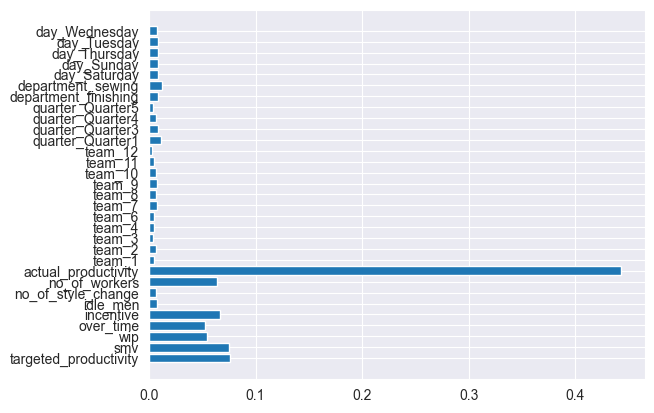

In [355]:
plt.barh(feature_names, rf.feature_importances_ )

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
result = permutation_importance()

In [ ]:
importance2=rf.coef_

y_test = y_test.astype(int)
y_train = y_train.astype(int)
importance_2 = importance2[0]
#append_df = importance_2.DataFrame(data=append_row)
impdf2 = pd.DataFrame(importance2, columns=feature_names2)
graphdf2 = pd.DataFrame.from_dict(impdf2)


In [ ]:
plt.figure(figsize=(50,15))
sns.barplot( data=graphdf2)

In [ ]:
plt.figure()
plt.figure(figsize=(50,15)) 
cols_to_plot2 = ['targeted_productivity', 'actual_productivity','incentive','no_of_workers','department_finishing','department_sewing'] 
sns.barplot(graphdf[cols_to_plot2])
plt.show()


## SVC

In [112]:
from sklearn.svm import SVC
from sklearn import metrics


In [113]:
svc= SVC(kernel='linear',C=1)

In [116]:
y_train = (y_train > 0)
y_test = (y_test > 0)

In [119]:
svc.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [120]:
y_pred = svc.predict(X_test)

In [121]:
print('Accuracy with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy with default hyperparameters: 0.9750


#### Test 2

In [158]:
data2 = dataset[['targeted_productivity', 'actual_productivity','incentive','no_of_workers','department_finishing','department_sewing']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2,productivit_met , test_size=0.20, random_state=42)
data2.feature_names = list(X_train2.columns.values)
feature_names2 = data2.feature_names
scaler = RobustScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.fit_transform(X_test2)

X_train2 = pd.DataFrame(X_train2, columns=[feature_names2])
X_test2 = pd.DataFrame(X_test2, columns=[feature_names2])

C:\Users\portapot2\AppData\Local\Temp\ipykernel_12820\2676679536.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data2.feature_names = list(X_train2.columns.values)


In [159]:
y_train2 = (y_train2 > 0)
y_test2 = (y_test2 > 0)

In [161]:
svc2= SVC(kernel='linear',C=1)

In [149]:
svc2.fit(X_train2,y_train2)

SVC(C=1, kernel='linear')

In [154]:
y_pred2 = svc2.predict(X_test2)

In [157]:
X_test2

targeted_productivity actual_productivity incentive no_of_workers   
0                    -1.5           -2.733998     -0.46     -0.212766  \
1                     0.5            0.172087      0.54     -0.446809   
2                     0.5           -0.479410     -0.46     -0.936170   
3                    -0.5           -2.423887     -0.46     -0.936170   
4                     0.5           -0.552897     -0.46     -0.936170   
..                    ...                 ...       ...           ...   
235                  -0.5           -0.375050      0.54      0.106383   
236                  -1.0            1.108706     -0.46     -0.936170   
237                  -1.5            0.992704     -0.46     -0.936170   
238                  -0.5           -0.289877     -0.46     -0.893617   
239                   0.5            0.170144      0.80      0.148936   

    department_finishing department_sewing  
0                    0.0               0.0  
1                    0.0               0.0  
2                    1.0              -1.0  
3                    1.0              -1.0  
4                    1.0              -1.0  
..                   ...               ...  
235                  0.0               0.0  
236                  1.0              -1.0  
237                  1.0              -1.0  
238                  1.0              -1.0  
239                  0.0               0.0  

[240 rows x 6 columns]

In [156]:
print('Accuracy with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test2, y_pred2)))

Accuracy with default hyperparameters: 0.9750


In [107]:
data2

0       0.80
1       0.75
2       0.80
3       0.80
4       0.80
        ... 
1192    0.75
1193    0.70
1194    0.65
1195    0.75
1196    0.70
Name: targeted_productivity, Length: 1197, dtype: float64

In [258]:
from sklearn import metrics

In [259]:
importance=svc.coef_
importance

array([[-2.74688552e+00,  3.76196658e-03,  1.29670918e-02,
         6.27971192e-03, -2.39566911e-02,  0.00000000e+00,
         5.26042405e-03, -3.81083429e-02,  5.50912478e+00,
        -3.73409891e-03, -1.11624265e-02, -2.54284268e-03,
        -1.11594453e-02, -1.13054700e-02, -1.35318248e-02,
         0.00000000e+00, -7.13828943e-03, -1.04349973e-02,
         1.83335665e-03, -1.06098632e-02,  1.13171807e-02,
         1.01090053e-02,  3.32501041e-03, -1.69752785e-02,
        -4.01567429e-01,  4.01567429e-01, -9.00399481e-04,
        -5.74173992e-03, -8.14519722e-03,  3.46179562e-03,
         1.04286498e-02]])

In [265]:
y_test = y_test.astype(int)

In [266]:
y_train = y_train.astype(int)

In [268]:
from sklearn.metrics import mean_squared_error

In [269]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [270]:
print(mse)
print(rmse)

0.025
0.15811388300841897


In [160]:
importance_1 = importance[0]

In [ ]:
append_df = importance_1.DataFrame(data=append_row)


In [171]:
for index,val in enumerate(importance_1):
    print("Feature : {} has score  : {} ".format(feature_names[index],val))

Feature : targeted_productivity has score  : -2.746885524077885 
Feature : smv has score  : 0.0037619665782272493 
Feature : wip has score  : 0.012967091814442833 
Feature : over_time has score  : 0.0062797119230776355 
Feature : incentive has score  : -0.023956691054676682 
Feature : idle_men has score  : 0.0 
Feature : no_of_style_change has score  : 0.005260424046669287 
Feature : no_of_workers has score  : -0.03810834289441262 
Feature : actual_productivity has score  : 5.509124777797647 
Feature : team_1 has score  : -0.0037340989136138703 
Feature : team_2 has score  : -0.011162426545530568 
Feature : team_3 has score  : -0.002542842679374636 
Feature : team_4 has score  : -0.01115944525136292 
Feature : team_6 has score  : -0.011305469991012451 
Feature : team_7 has score  : -0.013531824805612658 
Feature : team_8 has score  : 0.0 
Feature : team_9 has score  : -0.007138289426606104 
Feature : team_10 has score  : -0.010434997309933358 
Feature : team_11 has score  : 0.001833356

In [ ]:
importance=np.sort(importance_1)


In [177]:
impdf = pd.DataFrame(importance, columns=feature_names)

In [192]:
impdf

targeted_productivity       smv       wip  over_time  incentive  idle_men   
0              -2.746886  0.003762  0.012967    0.00628  -0.023957       0.0  \

   no_of_style_change  no_of_workers  actual_productivity    team_1  ...   
0             0.00526      -0.038108             5.509125 -0.003734  ...  \

   quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  department_finishing   
0          0.010109          0.003325         -0.016975             -0.401567  \

   department_sewing  day_Saturday  day_Sunday  day_Thursday  day_Tuesday   
0           0.401567       -0.0009   -0.005742     -0.008145     0.003462  \

   day_Wednesday  
0       0.010429  

[1 rows x 31 columns]

In [204]:

#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar([i in range (len(impdf.columns()))],impdf)
plt.show()


TypeError: 'Index' object is not callable

In [ ]:
graphdf = pd.DataFrame.from_dict(impdf)


In [271]:
graphy = graphdf

In [273]:
graphdf.columns

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'team_1', 'team_2', 'team_3', 'team_4', 'team_6',
       'team_7', 'team_8', 'team_9', 'team_10', 'team_11', 'team_12',
       'quarter_Quarter1', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sewing',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

In [ ]:
graphy.pop('targeted_productivity',
       'actual_productivity','department_finishing', 'department_sewing')

In [ ]:
imp2 = permutation_importance(svc, X_test, y_test)

In [ ]:
plt.barh(feature_names, imp2)

<Axes: >

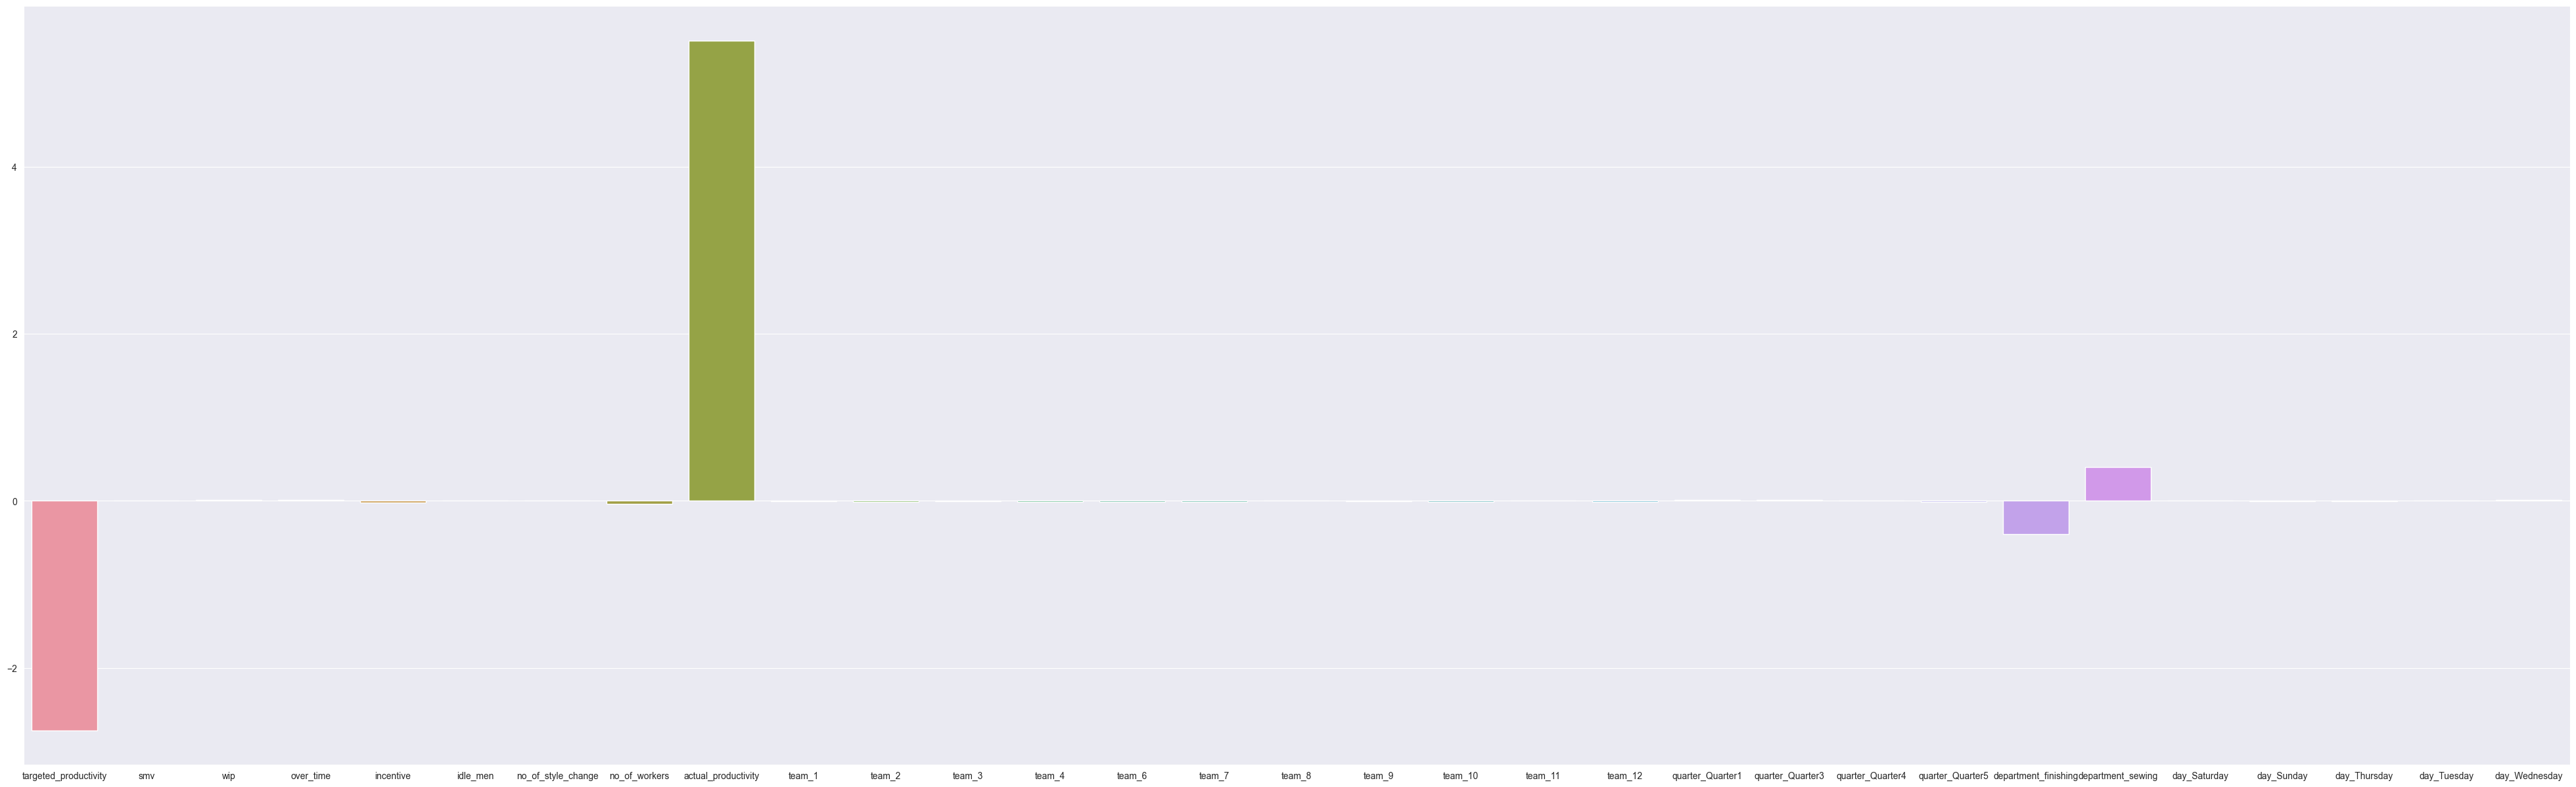

In [326]:

plt.figure(figsize=(50,15))
sns.barplot( data=graphy)


<Figure size 640x480 with 0 Axes>

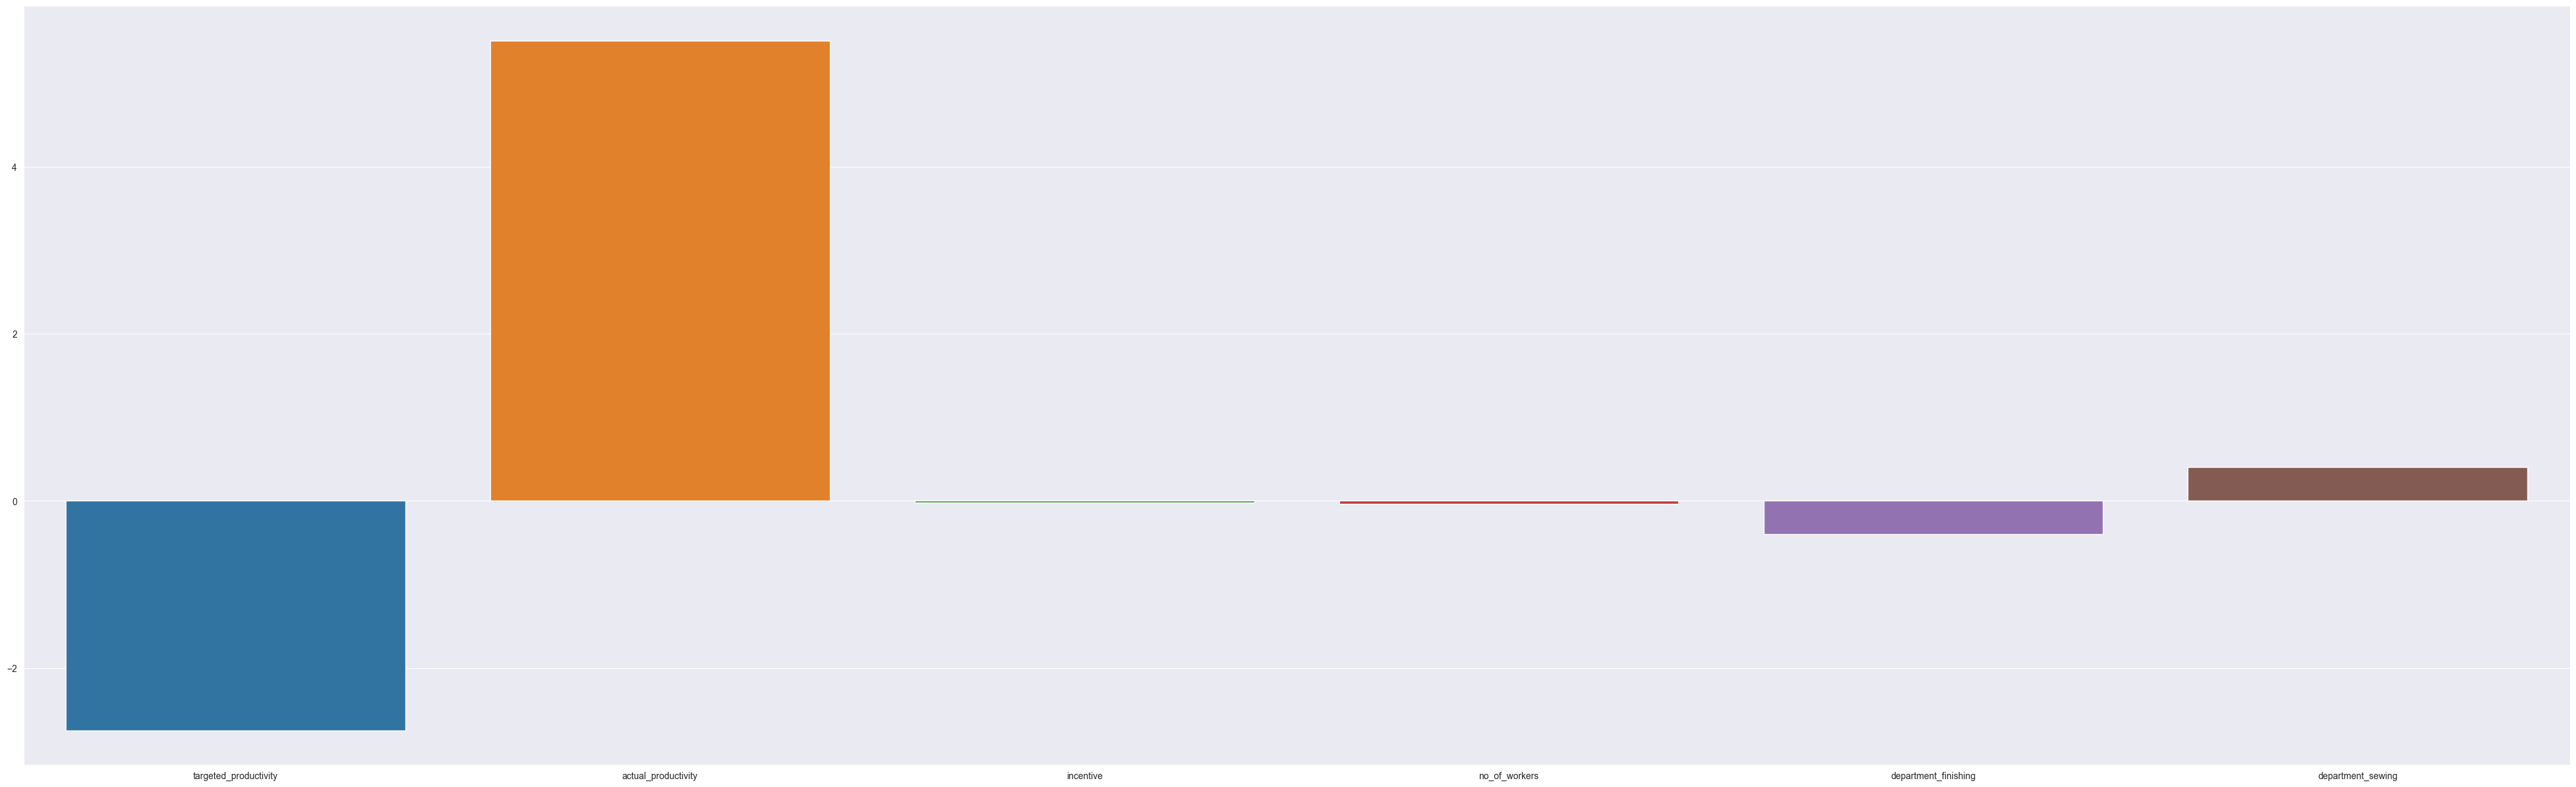

In [314]:
plt.figure()
plt.figure(figsize=(50,15)) 
cols_to_plot = ['targeted_productivity', 'actual_productivity','incentive','no_of_workers','department_finishing','department_sewing']
sns.barplot(graphdf[cols_to_plot])
plt.show()

targeted_productivity       smv       wip  over_time  incentive  idle_men   
0              -2.746886  0.003762  0.012967    0.00628  -0.023957       0.0  \

   no_of_style_change  no_of_workers  actual_productivity    team_1  ...   
0             0.00526      -0.038108             5.509125 -0.003734  ...  \

   quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  department_finishing   
0          0.010109          0.003325         -0.016975             -0.401567  \

   department_sewing  day_Saturday  day_Sunday  day_Thursday  day_Tuesday   
0           0.401567       -0.0009   -0.005742     -0.008145     0.003462  \

   day_Wednesday  
0       0.010429  

[1 rows x 31 columns]

In [ ]:
graphdf

<Figure size 5000x1500 with 0 Axes>

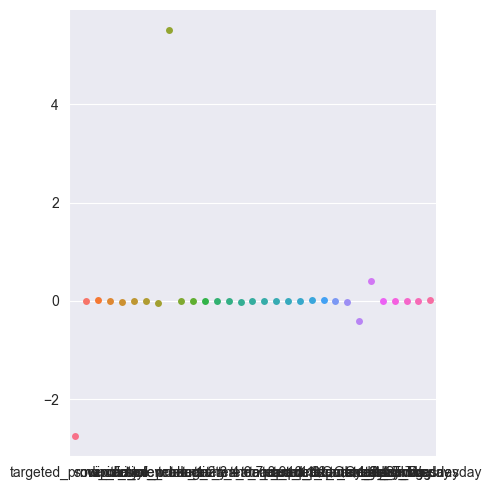

In [214]:


plt.figure(figsize=(50,15))
sns.catplot( data=graphdf)

## K-Nearest Neighbor(KNN)

In [253]:
from sklearn.neighbors import KNeighborsClassifier

In [256]:
knn = KNeighborsClassifier(n_neighbors=27)

In [121]:
#Set Y to binary value for classification
y_train = (y_train > 0)
y_test = (y_test > 0)

In [122]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [123]:
y_pred = knn.predict(X_test)

In [124]:
print('Accuracy with KNN: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy with KNN: 0.8917


In [125]:
print('Training score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Training score: 0.9143
Test score: 0.8917


In [96]:
X_train.columns

MultiIndex([(                 'smv',),
            (                 'wip',),
            (           'over_time',),
            (           'incentive',),
            (           'idle_time',),
            (            'idle_men',),
            (  'no_of_style_change',),
            (       'no_of_workers',),
            (              'team_1',),
            (              'team_2',),
            (              'team_3',),
            (              'team_4',),
            (              'team_5',),
            (              'team_6',),
            (              'team_7',),
            (              'team_8',),
            (              'team_9',),
            (             'team_10',),
            (             'team_11',),
            (    'quarter_Quarter1',),
            (    'quarter_Quarter3',),
            (    'quarter_Quarter4',),
            (    'quarter_Quarter5',),
            ('department_finishing',),
            (   'department_sewing',),
            (        'day

In [228]:
datatest = dataset

In [229]:
dataset

targeted_productivity    smv     wip  over_time  incentive  idle_men   
0                      0.80  26.16  1108.0       7080         98         0  \
1                      0.75   3.94     0.0        960          0         0   
2                      0.80  11.41   968.0       3660         50         0   
3                      0.80  11.41   968.0       3660         50         0   
4                      0.80  25.90  1170.0       1920         50         0   
...                     ...    ...     ...        ...        ...       ...   
1192                   0.75   2.90     0.0        960          0         0   
1193                   0.70   3.90     0.0        960          0         0   
1194                   0.65   3.90     0.0        960          0         0   
1195                   0.75   2.90     0.0       1800          0         0   
1196                   0.70   2.90     0.0        720          0         0   

      no_of_style_change  no_of_workers  actual_productivity  team_1  ...   
0                      0           59.0             0.940725   False  ...  \
1                      0            8.0             0.886500    True  ...   
2                      0           30.5             0.800570   False  ...   
3                      0           30.5             0.800570   False  ...   
4                      0           56.0             0.800382   False  ...   
...                  ...            ...                  ...     ...  ...   
1192                   0            8.0             0.628333   False  ...   
1193                   0            8.0             0.625625   False  ...   
1194                   0            8.0             0.625625   False  ...   
1195                   0           15.0             0.505889   False  ...   
1196                   0            6.0             0.394722   False  ...   

      quarter_Quarter3  quarter_Quarter4  quarter_Quarter5   
0                False             False             False  \
1                False             False             False   
2                False             False             False   
3                False             False             False   
4                False             False             False   
...                ...               ...               ...   
1192             False             False             False   
1193             False             False             False   
1194             False             False             False   
1195             False             False             False   
1196             False             False             False   

      department_finishing  department_sewing  day_Saturday  day_Sunday   
0                    False               True         False       False  \
1                     True              False         False       False   
2                    False               True         False       False   
3                    False               True         False       False   
4                    False               True         False       False   
...                    ...                ...           ...         ...   
1192                  True              False         False       False   
1193                  True              False         False       False   
1194                  True              False         False       False   
1195                  True              False         False       False   
1196                  True              False         False       False   

      day_Thursday  day_Tuesday  day_Wednesday  
0             True        False          False  
1             True        False          False  
2             True        False          False  
3             True        False          False  
4             True        False          False  
...            ...          ...            ...  
1192         False        False           True  
1193         False        False           True  
1194         False        False           True  
1195    

In [230]:
datatest

targeted_productivity    smv     wip  over_time  incentive  idle_men   
0                      0.80  26.16  1108.0       7080         98         0  \
1                      0.75   3.94     0.0        960          0         0   
2                      0.80  11.41   968.0       3660         50         0   
3                      0.80  11.41   968.0       3660         50         0   
4                      0.80  25.90  1170.0       1920         50         0   
...                     ...    ...     ...        ...        ...       ...   
1192                   0.75   2.90     0.0        960          0         0   
1193                   0.70   3.90     0.0        960          0         0   
1194                   0.65   3.90     0.0        960          0         0   
1195                   0.75   2.90     0.0       1800          0         0   
1196                   0.70   2.90     0.0        720          0         0   

      no_of_style_change  no_of_workers  actual_productivity  team_1  ...   
0                      0           59.0             0.940725   False  ...  \
1                      0            8.0             0.886500    True  ...   
2                      0           30.5             0.800570   False  ...   
3                      0           30.5             0.800570   False  ...   
4                      0           56.0             0.800382   False  ...   
...                  ...            ...                  ...     ...  ...   
1192                   0            8.0             0.628333   False  ...   
1193                   0            8.0             0.625625   False  ...   
1194                   0            8.0             0.625625   False  ...   
1195                   0           15.0             0.505889   False  ...   
1196                   0            6.0             0.394722   False  ...   

      quarter_Quarter3  quarter_Quarter4  quarter_Quarter5   
0                False             False             False  \
1                False             False             False   
2                False             False             False   
3                False             False             False   
4                False             False             False   
...                ...               ...               ...   
1192             False             False             False   
1193             False             False             False   
1194             False             False             False   
1195             False             False             False   
1196             False             False             False   

      department_finishing  department_sewing  day_Saturday  day_Sunday   
0                    False               True         False       False  \
1                     True              False         False       False   
2                    False               True         False       False   
3                    False               True         False       False   
4                    False               True         False       False   
...                    ...                ...           ...         ...   
1192                  True              False         False       False   
1193                  True              False         False       False   
1194                  True              False         False       False   
1195                  True              False         False       False   
1196                  True              False         False       False   

      day_Thursday  day_Tuesday  day_Wednesday  
0             True        False          False  
1             True        False          False  
2             True        False          False  
3             True        False          False  
4             True        False          False  
...            ...          ...            ...  
1192         False        False           True  
1193         False        False           True  
1194         False        False           True  
1195    

In [231]:
productivit_met

0       0.140725
1       0.136500
2       0.000570
3       0.000570
4       0.000382
          ...   
1192   -0.121667
1193   -0.074375
1194   -0.024375
1195   -0.244111
1196   -0.305278
Length: 1197, dtype: float64

In [227]:
datatest.__add__(productivit_met)

0   1   2   3   4   5   6   7   8   9  ...  team_11  team_12  team_2   
0    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...      NaN      NaN     NaN  \
1    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...      NaN      NaN     NaN   
2    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...      NaN      NaN     NaN   
3    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...      NaN      NaN     NaN   
4    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...      NaN      NaN     NaN   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...      ...      ...     ...   
1192 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...      NaN      NaN     NaN   
1193 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...      NaN      NaN     NaN   
1194 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...      NaN      NaN     NaN   
1195 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...      NaN      NaN     NaN   
1196 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...      NaN      NaN     NaN   

      team_3  team_4  team_6  team_7  team_8  team_9  wip  
0        NaN     NaN     NaN     NaN     NaN     NaN  NaN  
1        NaN     NaN     NaN     NaN     NaN     NaN  NaN  
2        NaN     NaN     NaN     NaN     NaN     NaN  NaN  
3        NaN     NaN     NaN     NaN     NaN     NaN  NaN  
4        NaN     NaN     NaN     NaN     NaN     NaN  NaN  
...      ...     ...     ...     ...     ...     ...  ...  
1192     NaN     NaN     NaN     NaN     NaN     NaN  NaN  
1193     NaN     NaN     NaN     NaN     NaN     NaN  NaN  
1194     NaN     NaN     NaN     NaN     NaN     NaN  NaN  
1195     NaN     NaN     NaN     NaN     NaN     NaN  NaN  
1196     NaN     NaN     NaN     NaN     NaN     NaN  NaN  

[1197 rows x 1228 columns]

In [288]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


path = "garments_worker_productivity.csv"
dataset = pd.read_csv(path, header=0, index_col=None, parse_dates=True)
dataset['department'].replace('sweing', 'sewing', inplace=True);
dataset['department'].replace('finishing ', 'finishing', inplace=True);
dataset['department'].unique();
dataset['wip'].fillna(0, inplace=True);
dataset = pd.get_dummies(dataset, columns=['team', 'quarter', 'department', 'day']);
productivit_met = dataset['actual_productivity'] -dataset['targeted_productivity'];
#dataset.pop('actual_productivity');
#dataset.pop('targeted_productivity');
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['date'] = dataset['date'].dt.strftime('%d')
dataset['date'] = dataset['date'].astype(str).astype(int)

In [293]:
rows_sewing = dataset[dataset.department_sewing == 1]
rows_finishing = dataset[dataset.department_finishing == 1]


In [294]:
rows_sewing

date  targeted_productivity    smv     wip  over_time  incentive   
0        1                   0.80  26.16  1108.0       7080         98  \
2        1                   0.80  11.41   968.0       3660         50   
3        1                   0.80  11.41   968.0       3660         50   
4        1                   0.80  25.90  1170.0       1920         50   
5        1                   0.80  25.90   984.0       6720         38   
...    ...                    ...    ...     ...        ...        ...   
1187    11                   0.75  26.82  1054.0       7080         45   
1188    11                   0.70  26.82   992.0       6960         30   
1189    11                   0.70  30.48   914.0       6840         30   
1190    11                   0.70  23.41  1128.0       4560         40   
1191    11                   0.65  30.48   935.0       6840         26   

      idle_time  idle_men  no_of_style_change  no_of_workers  ...   
0           0.0         0                   0           59.0  ...  \
2           0.0         0                   0           30.5  ...   
3           0.0         0                   0           30.5  ...   
4           0.0         0                   0           56.0  ...   
5           0.0         0                   0           56.0  ...   
...         ...       ...                 ...            ...  ...   
1187        0.0         0                   0           59.0  ...   
1188        0.0         0                   1           58.0  ...   
1189        0.0         0                   1           57.0  ...   
1190        0.0         0                   1           38.0  ...   
1191        0.0         0                   1           57.0  ...   

      quarter_Quarter4  quarter_Quarter5  department_finishing   
0                False             False                 False  \
2                False             False                 False   
3                False             False                 False   
4                False             False                 False   
5                False             False                 False   
...                ...               ...                   ...   
1187             False             False                 False   
1188             False             False                 False   
1189             False             False                 False   
1190             False             False                 False   
1191             False             False                 False   

      department_sewing  day_Monday  day_Saturday  day_Sunday  day_Thursday   
0                  True       False         False       False          True  \
2                  True       False         False       False          True   
3                  True       False         False       False          True   
4                  True       False         False       False          True   
5                  True       False         False       False          True   
...                 ...         ...           ...         ...           ...   
1187               True       False         False       False         False   
1188               True       False         False       False         False   
1189               True       False         False       False         False   
1190               True       False         False       False         False   
1191               True       False         False       False         False   

      day_Tuesday  day_Wednesday  
0           False          False  
2           False          False  
3           False          False  
4           False          False  
5           False          False  
...           ...            ...  
1187        False           True  
1188        False           True  
1189        False           True  
1190        False           True  
1191        False           True  

[691 rows x 36 columns]

In [295]:
rows_sewing['actual_productivity'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       0.940725
2       0.800570
3       0.800570
4       0.800382
5       0.800125
          ...   
1187    0.750051
1188    0.700557
1189    0.700505
1190    0.700246
1191    0.650596
Name: actual_productivity, Length: 691, dtype: float64>

In [296]:
rows_finishing['actual_productivity'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 1       0.886500
6       0.755167
13      0.705917
14      0.676667
15      0.593056
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 506, dtype: float64>

date                       int32
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
team_1                      bool
team_2                      bool
team_3                      bool
team_4                      bool
team_5                      bool
team_6                      bool
team_7                      bool
team_8                      bool
team_9                      bool
team_10                     bool
team_11                     bool
team_12                     bool
quarter_Quarter1            bool
quarter_Quarter2            bool
quarter_Quarter3            bool
quarter_Quarter4            bool
quarter_Quarter5            bool
department_finishing        bool
department_sewing           bool
day_Monday

In [323]:
rows_sewing.smv.mean()

23.245412445730825

In [322]:
rows_finishing.smv.mean()

3.887035573122529

In [324]:
rows_sewing.wip.sum()

822612.0

## PCA Component Accuracy Chart

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance


In [ ]:
# From https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_refit_callable.html
# Author: Wenhao Zhang <wenhaoz@ucla.edu>

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC


def lower_bound(cv_results):
    """
    Calculate the lower bound within 1 standard deviation
    of the best `mean_test_scores`.

    Parameters
    ----------
    cv_results : dict of numpy(masked) ndarrays
        See attribute cv_results_ of `GridSearchCV`

    Returns
    -------
    float
        Lower bound within 1 standard deviation of the
        best `mean_test_score`.
    """
    best_score_idx = np.argmax(cv_results["mean_test_score"])

    return (
        cv_results["mean_test_score"][best_score_idx]
        - cv_results["std_test_score"][best_score_idx]
    )


def best_low_complexity(cv_results):
    """
    Balance model complexity with cross-validated score.

    Parameters
    ----------
    cv_results : dict of numpy(masked) ndarrays
        See attribute cv_results_ of `GridSearchCV`.

    Return
    ------
    int
        Index of a model that has the fewest PCA components
        while has its test score within 1 standard deviation of the best
        `mean_test_score`.
    """
    threshold = lower_bound(cv_results)
    candidate_idx = np.flatnonzero(cv_results["mean_test_score"] >= threshold)
    best_idx = candidate_idx[
        cv_results["param_reduce_dim__n_components"][candidate_idx].argmin()
    ]
    return best_idx


pipe = Pipeline(
    [
        ("reduce_dim", PCA(random_state=42)),
        #("classify", LinearSVC(random_state=42, C=1)),
        #("classify", RandomForestClassifier()),
        #("classify", GaussianNB()),
        ("classify", LogisticRegression()),


    ]
)

y_train = (y_train > 0)
y_test = (y_test > 0)

param_grid = {"reduce_dim__n_components": [6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34 , 36]}

grid = GridSearchCV(
    pipe,
    cv=10,
    n_jobs=1,
    param_grid=param_grid,
    scoring="accuracy",
    refit=best_low_complexity,
)

grid.fit(X_train, y_train)

n_components = grid.cv_results_["param_reduce_dim__n_components"]
test_scores = grid.cv_results_["mean_test_score"]

plt.figure()
plt.bar(n_components, test_scores, width=1.3, color="b")

lower = lower_bound(grid.cv_results_)
plt.axhline(np.max(test_scores), linestyle="--", color="y", label="Best score")
plt.axhline(lower, linestyle="--", color=".5", label="Best score - 1 std")

plt.title("Balance model complexity and cross-validated score")
plt.xlabel("Number of PCA components used")
plt.ylabel("Classification accuracy")
plt.xticks(n_components.tolist())
plt.ylim((0, 1.0))
plt.legend(loc="upper left")

best_index_ = grid.best_index_

print("The best_index_ is %d" % best_index_)
print("The n_components selected is %d" % n_components[best_index_])
print(
    "The corresponding accuracy score is %.2f"
    % grid.cv_results_["mean_test_score"][best_index_]
)
plt.show()

In [84]:

y_train = (y_train > 0)
y_test = (y_test > 0)
param_grid = {"reduce_dim__n_components": [2,4,6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34 , 36]}


c:\Users\portapot2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The best_index_ is 3
The n_components selected is 8
The corresponding accuracy score is 0.97
The corresponding accuracy score is 0.97


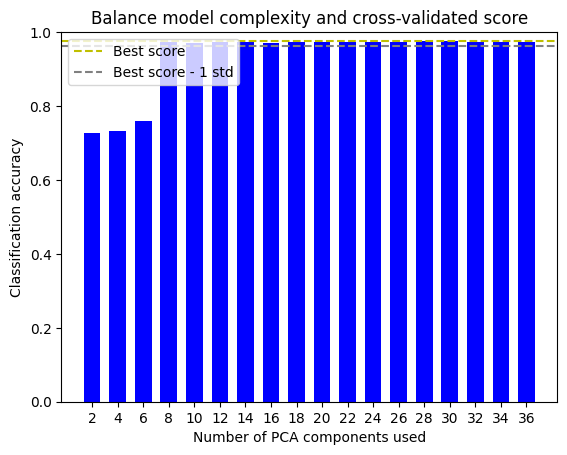

The best_index_ is 3
The n_components selected is 8
The corresponding accuracy score is 0.96
The corresponding accuracy score is 0.96


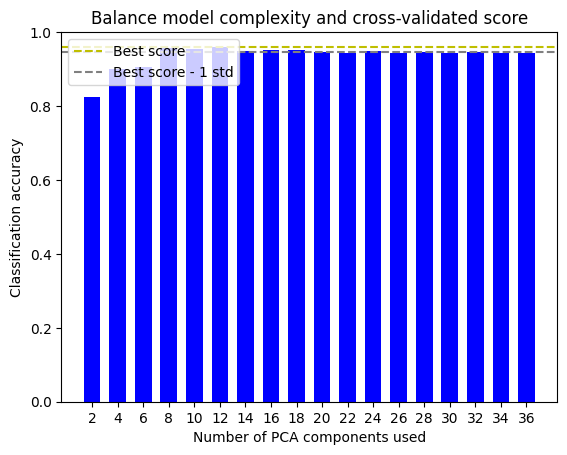

The best_index_ is 3
The n_components selected is 8
The corresponding accuracy score is 0.92
The corresponding accuracy score is 0.92


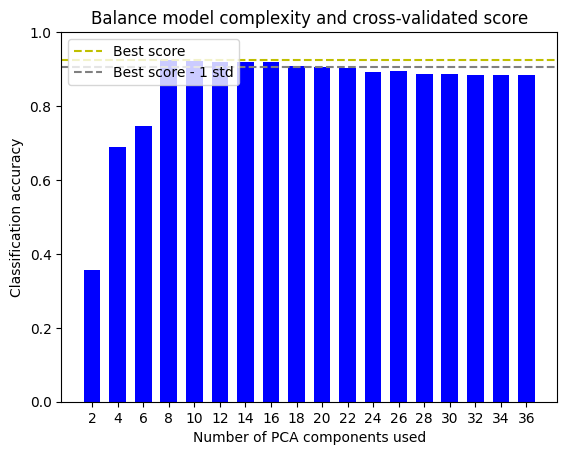

In [103]:
regressionlist = [("classify", LinearSVC(random_state=42, C=1)),("classify", RandomForestClassifier()),("classify", GaussianNB())]

for i in range(len(regressionlist)):
    pipe = Pipeline(
        [
            ('scaler',RobustScaler()),
            ("reduce_dim", PCA()),
            regressionlist[i],
        ]
    )



    grid = GridSearchCV(
        pipe,
        cv=10,
        n_jobs=5,
        param_grid=param_grid,
        scoring="accuracy",
        refit=best_low_complexity,
    )

    grid.fit(X_train, y_train)

    n_components = grid.cv_results_["param_reduce_dim__n_components"]
    test_scores = grid.cv_results_["mean_test_score"]

    plt.figure()
    plt.bar(n_components, test_scores, width=1.3, color="b")

    lower = lower_bound(grid.cv_results_)
    plt.axhline(np.max(test_scores), linestyle="--", color="y", label="Best score")
    plt.axhline(lower, linestyle="--", color=".5", label="Best score - 1 std")

    plt.title("Balance model complexity and cross-validated score")
    plt.xlabel("Number of PCA components used")
    plt.ylabel("Classification accuracy")
    plt.xticks(n_components.tolist())
    plt.ylim((0, 1.0))
    plt.legend(loc="upper left")

    best_index_ = grid.best_index_

    print("The best_index_ is %d" % best_index_)
    print("The n_components selected is %d" % n_components[best_index_])
    print(
        "The corresponding accuracy score is %.2f"
        % grid.cv_results_["mean_test_score"][best_index_]
    )

    print(
        "The corresponding accuracy score is %.2f"
        % grid.cv_results_["mean_test_score"][best_index_]
    )

    plt.show()


In [175]:
X_train2.shape

(957, 6)

The best_index_ is 1
The n_components selected is 4
The corresponding accuracy score is 0.97
The corresponding accuracy score is 0.97


c:\Users\portapot2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


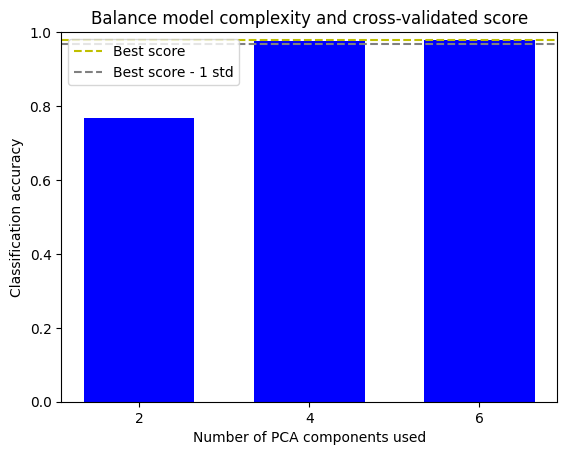

The best_index_ is 1
The n_components selected is 4
The corresponding accuracy score is 0.97
The corresponding accuracy score is 0.97


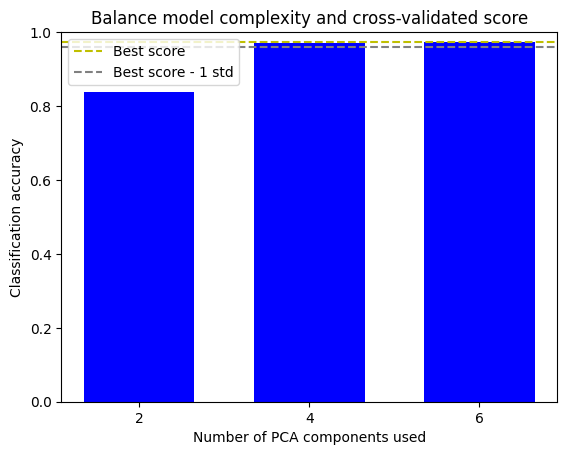

The best_index_ is 1
The n_components selected is 4
The corresponding accuracy score is 0.91
The corresponding accuracy score is 0.91


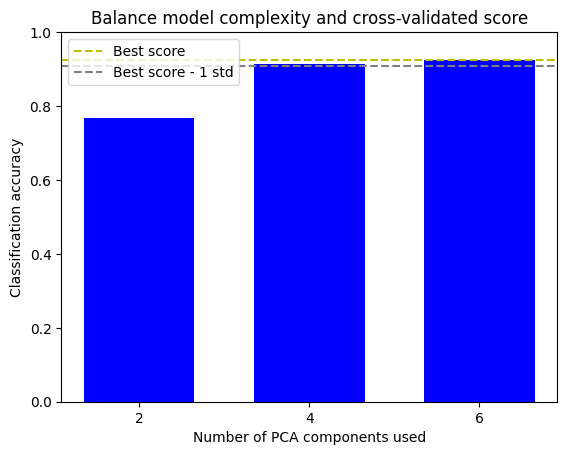

In [178]:
param_grid2 = {"reduce_dim__n_components": [2,4,6]}

regressionlist = [("classify", LinearSVC(random_state=42, C=1)),("classify", RandomForestClassifier()),("classify", GaussianNB())]

for i in range(len(regressionlist)):
    pipe = Pipeline(
        [
            ('scaler',StandardScaler()),
            ("reduce_dim", PCA()),
            regressionlist[i],
        ]
    )



    grid = GridSearchCV(
        pipe,
        cv=10,
        n_jobs=5,
        param_grid=param_grid2,
        scoring="accuracy",
        refit=best_low_complexity,
    )

    grid.fit(X_train2, y_train2)

    n_components = grid.cv_results_["param_reduce_dim__n_components"]
    test_scores = grid.cv_results_["mean_test_score"]

    plt.figure()
    plt.bar(n_components, test_scores, width=1.3, color="b")

    lower = lower_bound(grid.cv_results_)
    plt.axhline(np.max(test_scores), linestyle="--", color="y", label="Best score")
    plt.axhline(lower, linestyle="--", color=".5", label="Best score - 1 std")

    plt.title("Balance model complexity and cross-validated score")
    plt.xlabel("Number of PCA components used")
    plt.ylabel("Classification accuracy")
    plt.xticks(n_components.tolist())
    plt.ylim((0, 1.0))
    plt.legend(loc="upper left")

    best_index_ = grid.best_index_

    print("The best_index_ is %d" % best_index_)
    print("The n_components selected is %d" % n_components[best_index_])
    print(
        "The corresponding accuracy score is %.2f"
        % grid.cv_results_["mean_test_score"][best_index_]
    )

    print(
        "The corresponding accuracy score is %.2f"
        % grid.cv_results_["mean_test_score"][best_index_]
    )

    plt.show()